In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import scipy.stats as stats
from scipy.stats import chi2_contingency 

variable	description

age 	 age in years

sex 	 (1 = male; 0 = female)

cp 	 chest pain type

trestbps 	 resting blood pressure (in mm Hg on admission to the hospital)

chol 	 serum cholestoral in mg/dl

fbs 	 (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg 	 resting electrocardiographic results

thalach 	 maximum heart rate achieved

exang 	 exercise induced angina (1 = yes; 0 = no)

oldpeak 	 ST depression induced by exercise relative to rest

slope 	 the slope of the peak exercise ST segment

ca 	 number of major vessels (0-3) colored by flourosopy

thal 	 3 = normal; 6 = fixed defect; 7 = reversable defect

target 	 1 or 0


In [2]:
df = pd.read_excel("C:/Users/Selam/Desktop/smiplilearn/capstone video/project3/datasets_healthcare/data.xlsx")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
#Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.
#Statical glimpse in to the dataset  
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.shape

(303, 14)

In [8]:
#finding duplicates
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
#droping duplicates
df1= df.drop_duplicates().copy()

In [10]:
df1[df.duplicated()]

C:\Users\Selam\Anaconda31\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [11]:
#No missing values
df.isna().sum(axis= 0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Text(0,0.5,'Count')

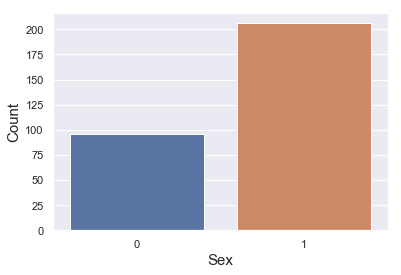

In [12]:
#Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools. For example: count plot.
#Categorical variables
#sex 	 (1 = male; 0 = female)

p= sns.countplot(x="sex", data=df1)

p.set_xlabel("Sex", fontsize = 15)
p.set_ylabel("Count", fontsize = 15)
#The number of males is almost double to the number of females

Text(0,0.5,'Count')

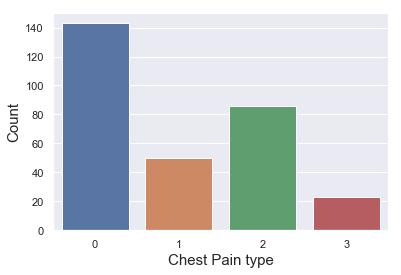

In [13]:
#cp 	 chest pain type
p=sns.countplot(x="cp", data= df1)
p.set_xlabel("Chest Pain type", fontsize = 15)
p.set_ylabel("Count", fontsize = 15)
#The chest pain type of patients in this dataset does not have even distibution. 

Text(0,0.5,'Count')

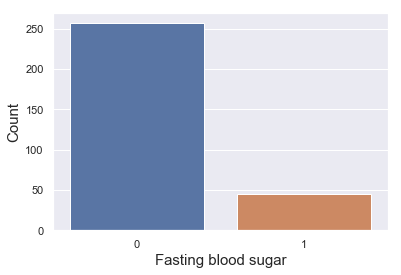

In [14]:
#fbs 	 (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
p=sns.countplot(x= "fbs", data= df1)
p.set_xlabel("Fasting blood sugar", fontsize = 15)
p.set_ylabel("Count", fontsize = 15)
#most of the patients in this dataset have fasting blood sugar less than 120mg/dl

Text(0,0.5,'Count')

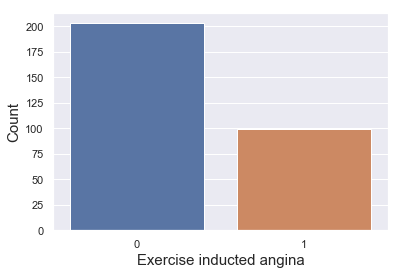

In [15]:
#exang 	 exercise induced angina (1 = yes; 0 = no)
p=sns.countplot(x= "exang",data= df1)
p.set_xlabel("Exercise inducted angina", fontsize = 15)
p.set_ylabel("Count", fontsize = 15)
#The number of patients that don't have exercise induced angina is double to the number of patients those who have angina

Text(0,0.5,'Count')

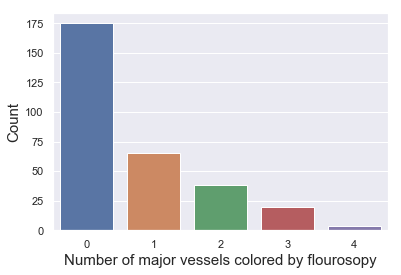

In [16]:
#ca 	 number of major vessels (0-3) colored by flourosopy
p=sns.countplot(x= "ca",data= df1)
p.set_xlabel("Number of major vessels colored by flourosopy", fontsize = 15)
p.set_ylabel("Count", fontsize = 15)
#As the number of vessels increased the count decreased.

Text(0,0.5,'Count')

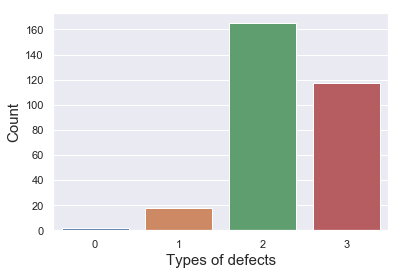

In [17]:
#thal 	 3 = normal; 6 = fixed defect; 7 = reversable defect (excel description)
p=sns.countplot(x= "thal",data= df1)
p.set_xlabel("Types of defects", fontsize = 15)
p.set_ylabel("Count", fontsize = 15)
# The description in the excel sheet does not match the numbers in the dataset.

In [18]:
df1["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

Text(0,0.5,'Count')

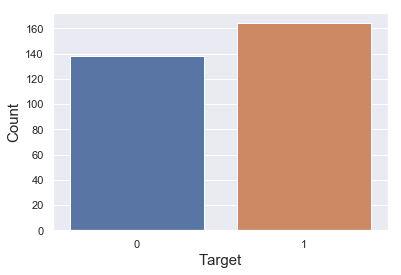

In [19]:
#target 	 1 or 0
p=sns.countplot(x= "target",data=df1)
p.set_xlabel("Target", fontsize = 15)
p.set_ylabel("Count", fontsize = 15)
#People who have heart attacks are little bit more in number than those who didn't. we can say that the target variable is almost balanced 

Text(0,0.5,'Target')

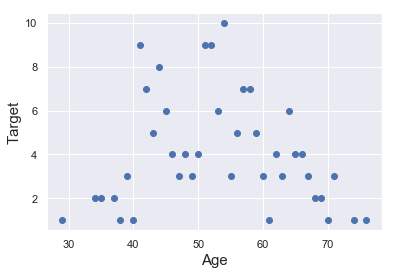

In [28]:
#Study the occurrence of CVD across different ages.
#Age vs Target (those who have heart attack)

tar_age= df1[["target","age"]]
he_att_yes= tar_age[tar_age["target"]== 1]
tar_age_grouped= he_att_yes.groupby(["age"], as_index= False).count()

plt.scatter(x= tar_age_grouped["age"], y= tar_age_grouped["target"])
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Target", fontsize = 15)
#Most of the occurance of heart attack is between the age 40 and 65. Based on this scatter plot heart attack is tend to happen between the age of 40 and 65.
#Specifically Between the age of 40 and 55 have higher count(frequency). 

Text(0,0.5,'Target')

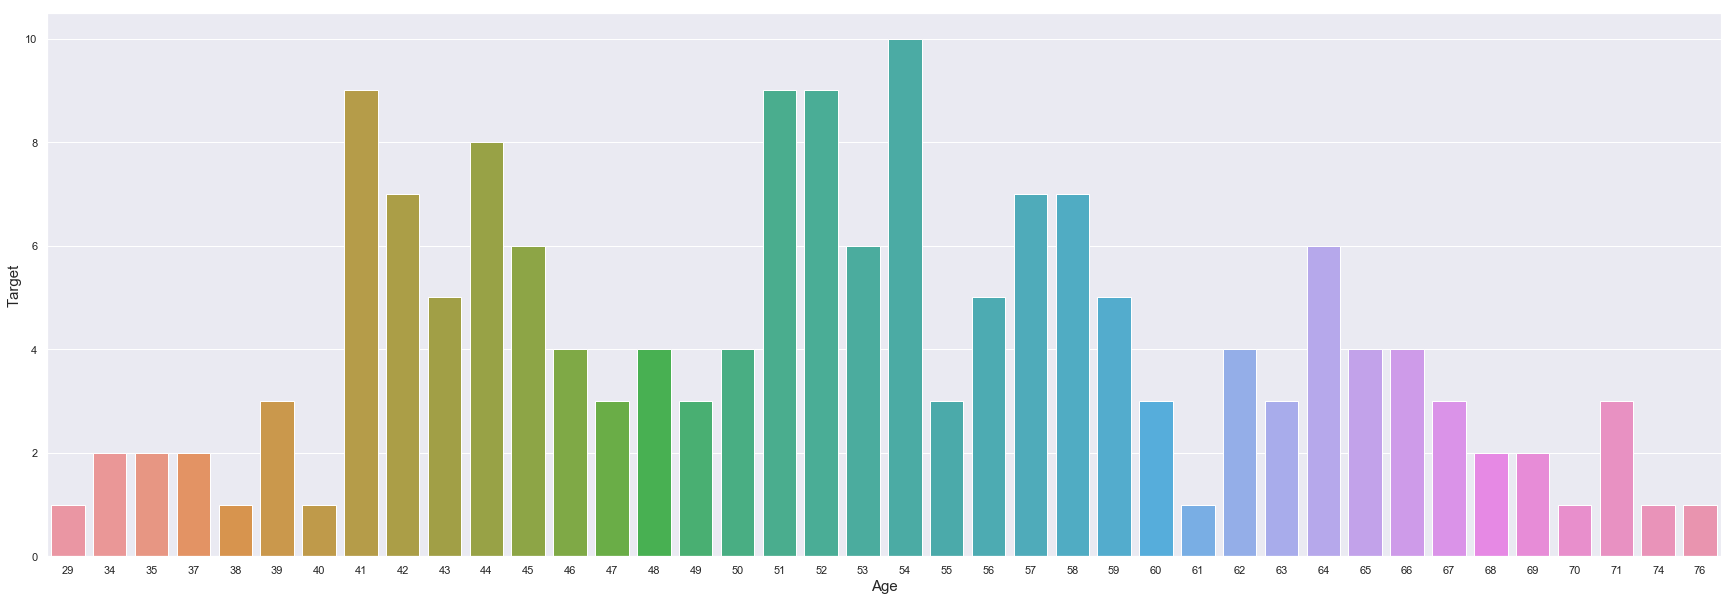

In [29]:
#Another way of looking at age vs cvd


tar_age= df1[["target","age"]]

fig = plt.figure(figsize=(30,10))

#Age vs Target (those who have heart attack)
he_att_yes= tar_age[tar_age["target"]== 1]
sorted_he_att_yes = he_att_yes.sort_values(by= "age", ascending=False)
p=sns.countplot(x="age", data= sorted_he_att_yes)
p.set_xlabel("Age", fontsize = 15)
p.set_ylabel("Target", fontsize = 15)








Text(0,0.5,'Resting blood pressure')

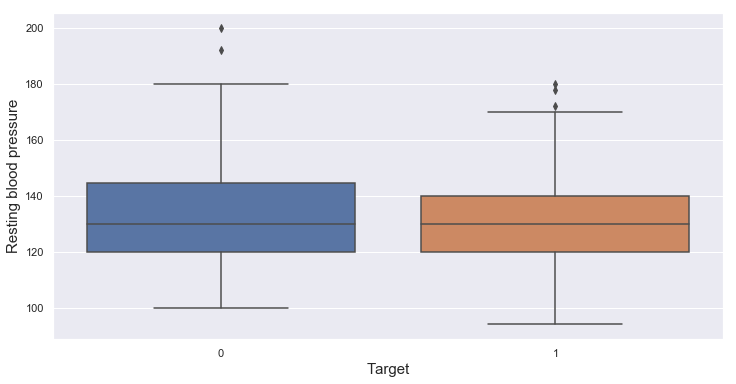

In [22]:
#Can we detect heart attack based on anomalies in resting blood pressure of the patient?
plt.figure(figsize= [12,6])
p=sns.boxplot(y="trestbps", x="target",data= df1)
p.set_xlabel("Target", fontsize = 15)
p.set_ylabel("Resting blood pressure", fontsize = 15)

#According to the cdc website the normal measure of blood pressure is below 120. 120 to 139 at risk and above 140 is high blood pressure.
#We can not detect heart attack based on anomalies because there are some patients who have anomalies resting blood pressure and
#didn't have heart attack. And there are some patients who have anomalies resting blood pressure and have heart attack.
# Since the anomalies are in both groups, anomalies in resting blood pressure may not detect heart attack.  



Text(0,0.5,'Target')

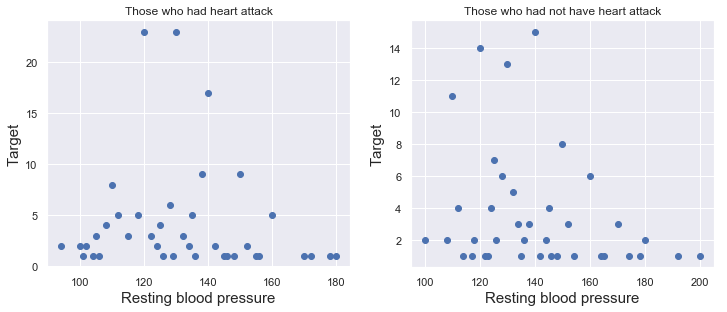

In [30]:
#Can we detect heart attack based on anomalies in resting blood pressure of the patient?


fig = plt.figure(figsize=(25,10))

ax1 = plt.subplot2grid((2,4),(0,1))
rest_blood_pre = df1[["trestbps","target"]]
heart_attack = rest_blood_pre[rest_blood_pre["target"]==1]
heart_attack_grouped = heart_attack.groupby(["trestbps"],as_index= False).count()
ax1.scatter(x= heart_attack_grouped["trestbps"], y= heart_attack_grouped["target"] )
plt.title('Those who had heart attack')
plt.xlabel("Resting blood pressure", fontsize = 15)
plt.ylabel("Target", fontsize = 15)

ax1 = plt.subplot2grid((2,4),(0,2))
heart_attack1 = rest_blood_pre[rest_blood_pre["target"]==0]
heart_attack_grouped1 = heart_attack1.groupby(["trestbps"],as_index= False).count()
ax1.scatter(x= heart_attack_grouped1["trestbps"], y= heart_attack_grouped1["target"] )
plt.title('Those who had not have heart attack')
plt.xlabel("Resting blood pressure", fontsize = 15)
plt.ylabel("Target", fontsize = 15)

#The distribution have some similarity. The distibution of the majority of resting blood pressure is from 100 to 160.
#The frequency have differences but since both groupes have anomalies we can't conclude that heart attack can be detected based on anomalies

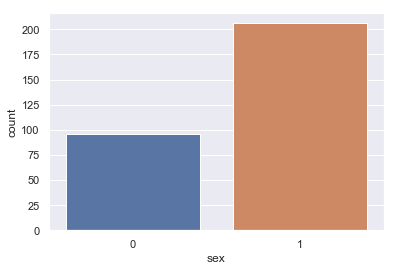

In [24]:
#Study the composition of overall patients w.r.t . gender.


sns.countplot(x="sex",data= df1)
# In the dataset there are double number of males than females

In [25]:
#Describe the relationship between cholesterol levels and our target variable.
#calculate point-biserial correlation
stats.pointbiserialr(df['chol'], df['target'])
#There is  no correlation between target variable and cholesterol level.

PointbiserialrResult(correlation=-0.08523910513756908, pvalue=0.1387903269560108)

In [94]:
#What can be concluded about the relationship between peak exercising and occurrence of heart attack?


#df1['slope'].unique()
chisqt = pd.crosstab(df1.target,df1.slope, margins=True)

value= np.array([chisqt.iloc[0][0:3].values,
chisqt.iloc[1][0:3].values])
c, p, dof, expected= chi2_contingency(value)
p
#There is correlation between target variable and peak exercising.  


6.5777827609179e-11

In [95]:
#Is thalassemia a major cause of CVD?
df1['thalach'].unique()
stats.pointbiserialr(df['thalach'], df['target'])
#There is medium postive correlation between target variable and thalassemia. This means that when thalassemia increases the occurrence of heart attack is more likely to increase.
#We can't say thalassemia is a major cause of CVD but they are correlated and something we need to pay attention to. 

PointbiserialrResult(correlation=0.4217409338106746, pvalue=1.6973376386560805e-14)

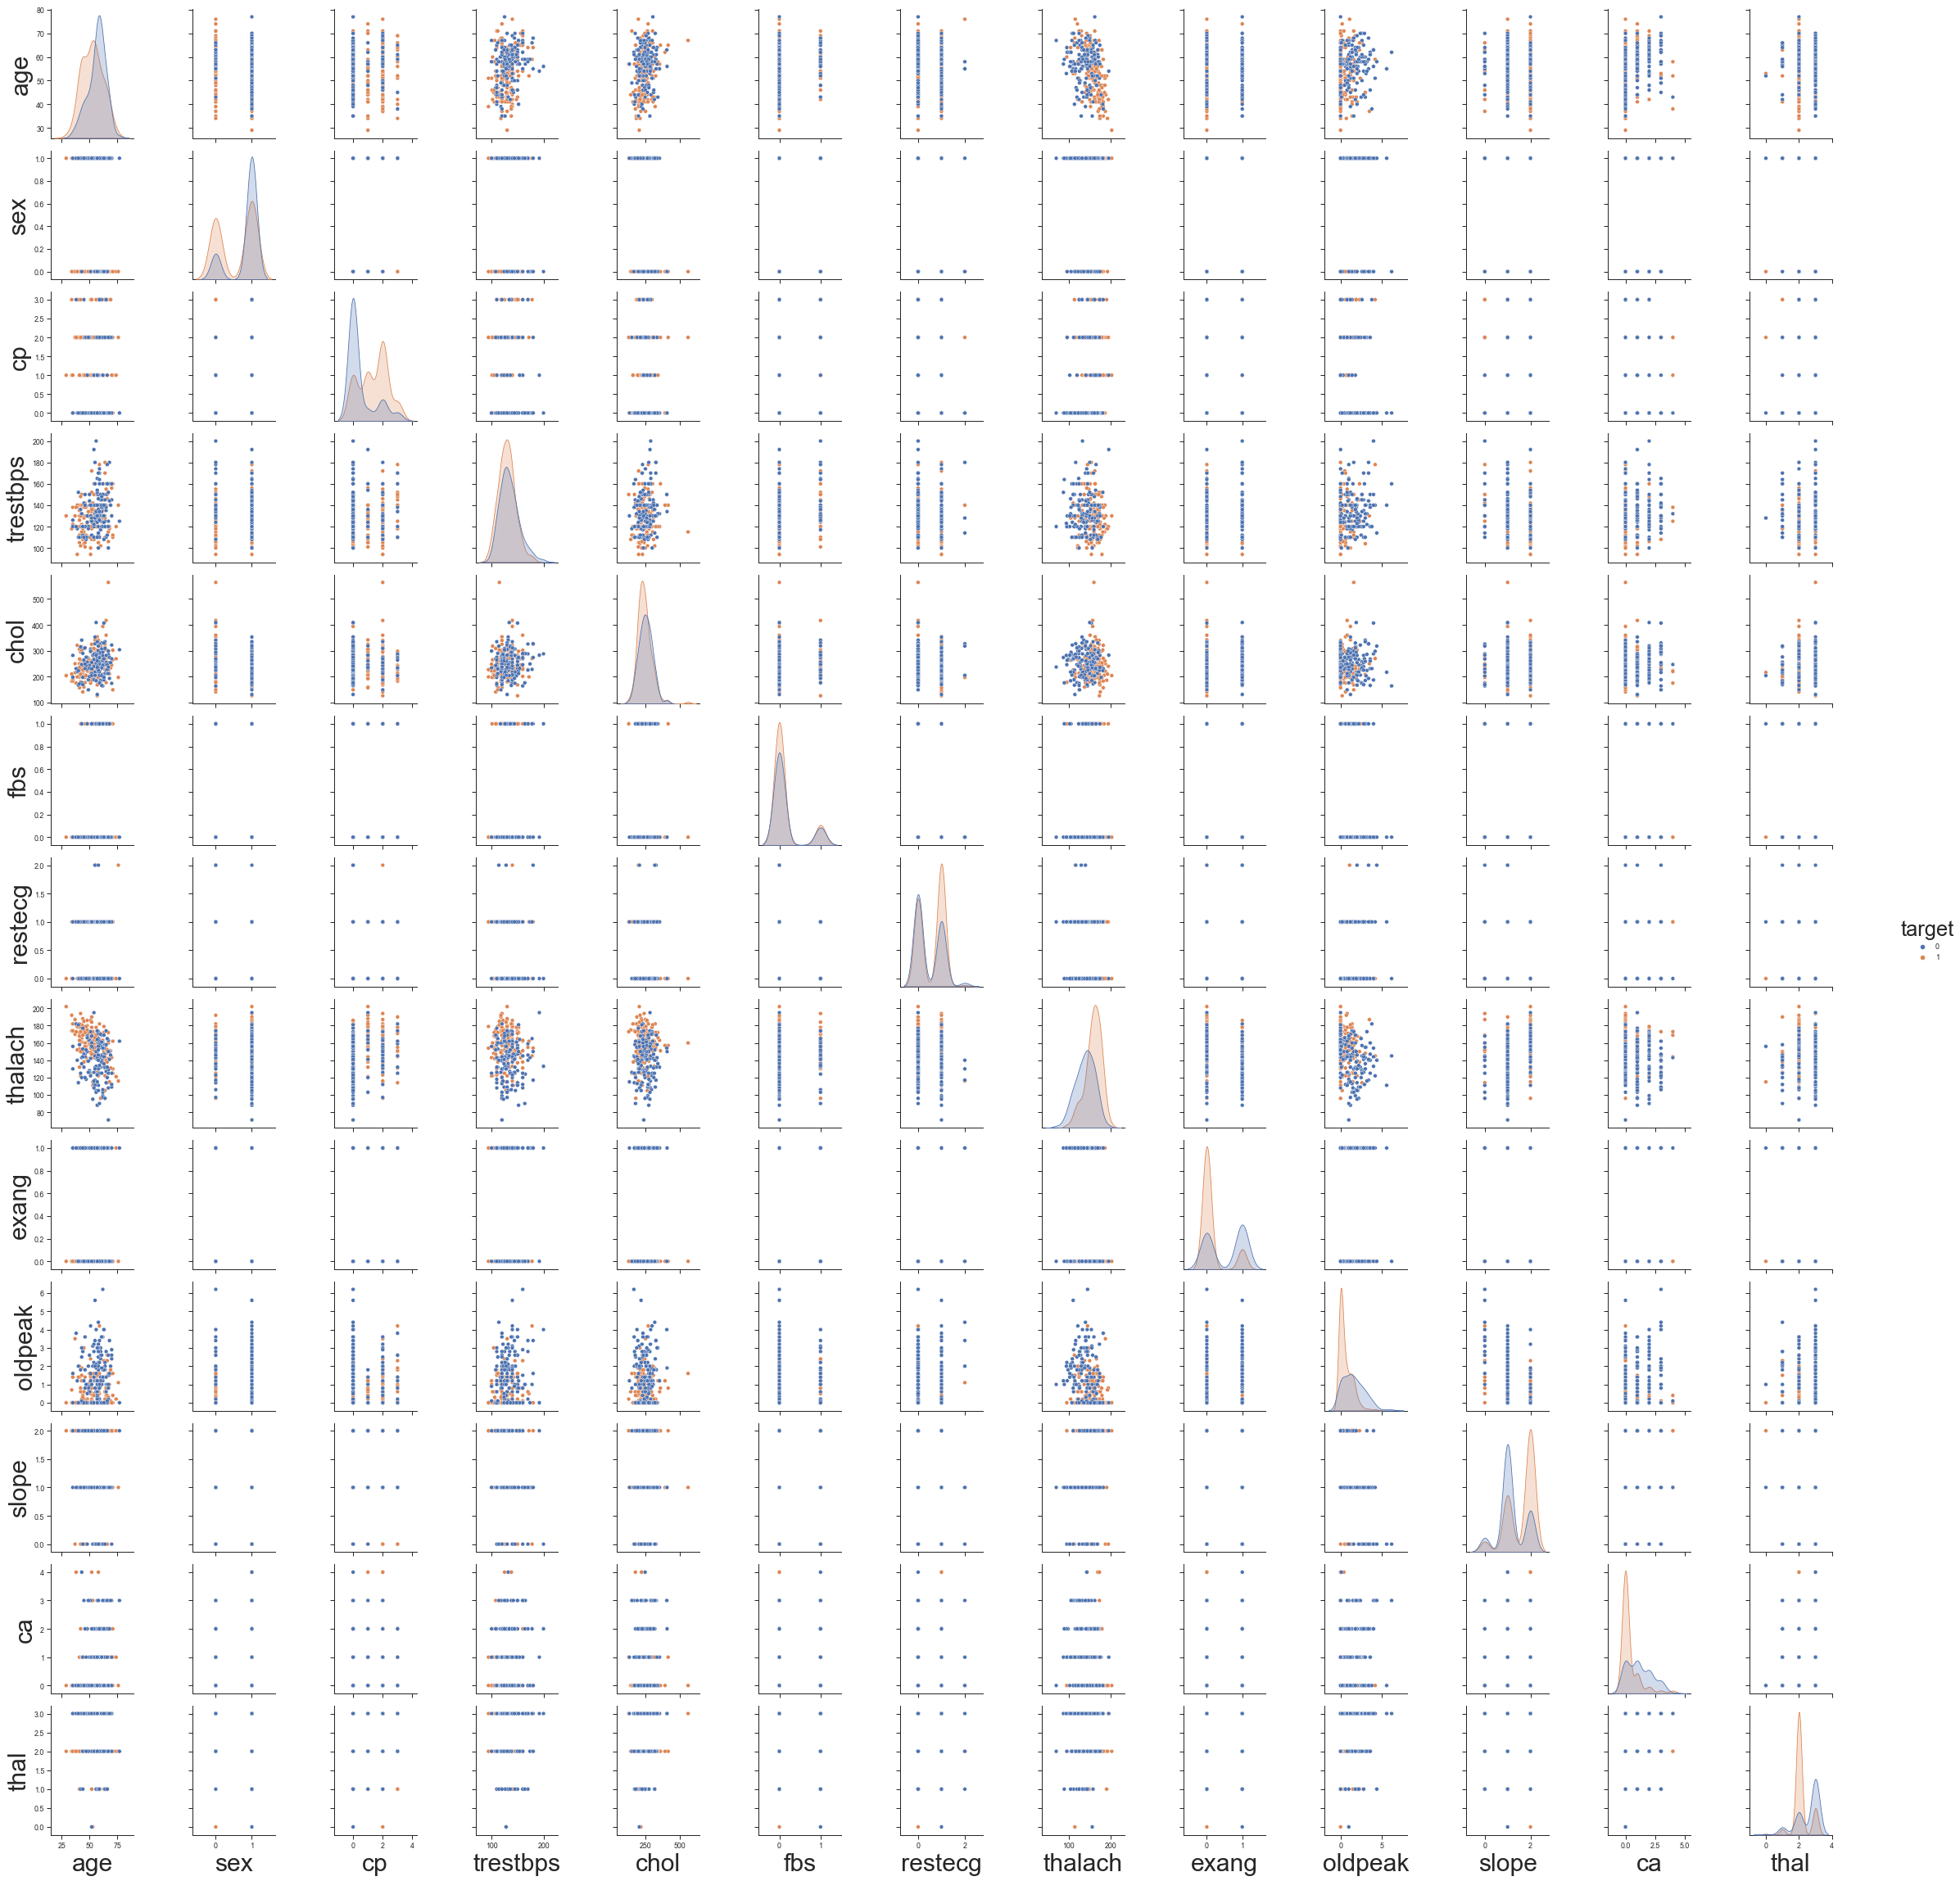

In [96]:
sns.set(style="ticks", color_codes=True)
sns.set_context("paper", rc={"axes.labelsize":30})
sns.pairplot(df1,hue = "target")
#explanation below one by one

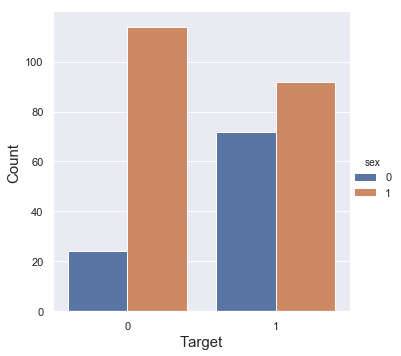

1.5508552054949547e-06

In [34]:
# How are the other factors determining the occurrence of CVD?


#sex 	 (1 = male; 0 = female) vs target 	 1 or 0
sns.catplot(hue="sex", x="target", kind="count", data=df1)
plt.xlabel("Target", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()
chisqt = pd.crosstab(df1.target,df1.sex, margins=True)
value= np.array([chisqt.iloc[0][0:2].values,
chisqt.iloc[1][0:2].values])
c, p, dof, expected= chi2_contingency(value)
p
#Males have higher number overall in the dataset. Also, males had heart attack more than females. Maybe more males tend to have heart attack. 
#There is correlation between sex and target.  

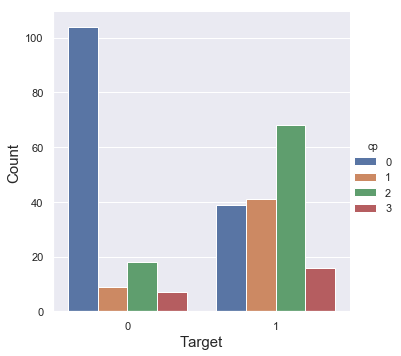

1.8926838351935918e-17

In [35]:
#cp 	 chest pain type vs target 	 1 or 0
sns.catplot(hue="cp", x="target", kind="count", data=df1)
plt.xlabel("Target", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

df1["cp"].unique()
chisqt = pd.crosstab(df1.target,df1.cp, margins=True)
value= np.array([chisqt.iloc[0][0:4].values,
chisqt.iloc[1][0:4].values])
c, p, dof, expected= chi2_contingency(value)
p
#Except chest pain type zero(0) all other types of chest pain are higher in the patients who have heart attack. This could mean that
# there is more chest pain in the people who have heart attack. This could be one of the factors to determine CVD.
# Chest pain and target variable have correlation. 

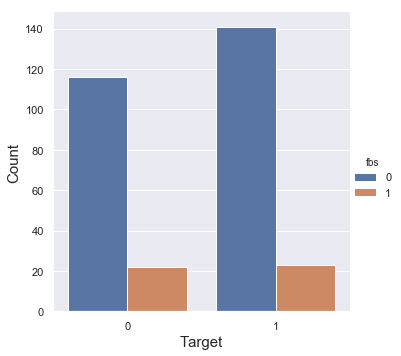

0.7611374700928197

In [36]:
#fbs 	 (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) vs target 	 1 or 0
sns.catplot(hue="fbs", x="target", kind="count", data=df1)
plt.xlabel("Target", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

df1["fbs"].unique()
chisqt = pd.crosstab(df1.target,df1.fbs, margins=True)
value= np.array([chisqt.iloc[0][0:2].values,
chisqt.iloc[1][0:2].values])
c, p, dof, expected= chi2_contingency(value)
p
# Fasting blood sugar and target variable do not correlate. 
# Most of the patients have a fasting blood sugar less than 120mg/dl

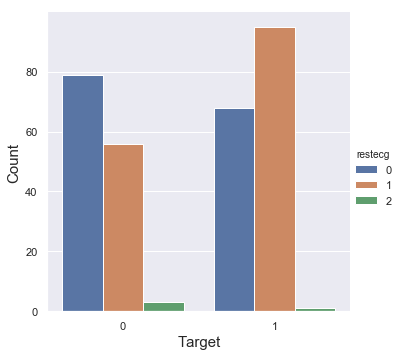

0.007713053269318978

In [37]:
#restecg 	 resting electrocardiographic results vs target 	 1 or 0
sns.catplot(hue="restecg", x="target", kind="count", data=df1)
plt.xlabel("Target", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

df1["restecg"].unique()

chisqt = pd.crosstab(df1.target,df1.restecg, margins=True)
value= np.array([chisqt.iloc[0][0:3].values,
chisqt.iloc[1][0:3].values])
c, p, dof, expected= chi2_contingency(value)
p
# Resting ECG results of zero and two are higher in those who do not have heart attack.
#Resting ECG results of one is higher in those who have heart attack. It can be something to pay attention to.
#Resting ECG result and target variable have correlation.

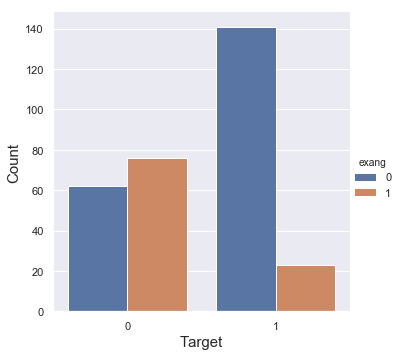

9.556466486179178e-14

In [38]:
#exang 	 exercise induced angina (1 = yes; 0 = no) vs target 	 1 or 0
sns.catplot(hue="exang", x="target", kind="count", data=df1)
plt.xlabel("Target", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()


df1["exang"].unique()

chisqt = pd.crosstab(df1.target,df1.exang, margins=True)
value= np.array([chisqt.iloc[0][0:2].values,
chisqt.iloc[1][0:2].values])
c, p, dof, expected= chi2_contingency(value)
p
# There is higher exercise induced angina in those who do not have heart attack than in those who do.
#There is a correlation between exercise induced angina and target variable. 

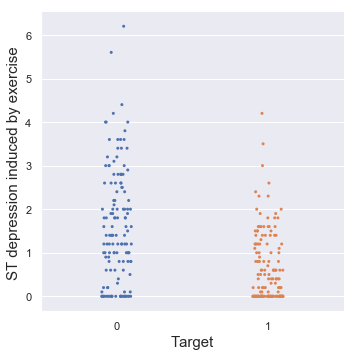

PointbiserialrResult(correlation=-0.4306960016873689, pvalue=4.085346391354478e-15)

In [39]:
#oldpeak 	 ST depression induced by exercise relative to rest vs target 	 1 or 0
sns.catplot(x="target", y="oldpeak",kind="strip",s= 3,data=df1)
plt.xlabel("Target", fontsize = 15)
plt.ylabel("ST depression induced by exercise", fontsize = 15)
plt.show()


df1["oldpeak"].unique()
stats.pointbiserialr(df['oldpeak'], df['target'])
#Those who have heart attack have low value of oldpeak than those who haven't. 
#ST depression induced by exercise relative to rest and target variable have a medium negative correlation. This means that as 
#oldpeak increases the target variable decreases. 

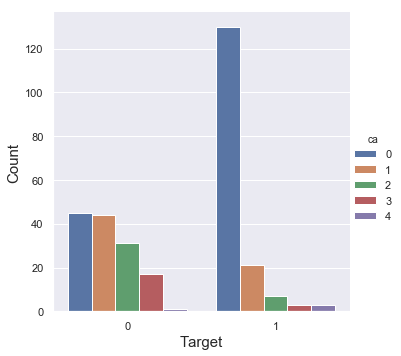

3.771038067427657e-15

In [40]:
#ca 	 number of major vessels (0-4) colored by flourosopy vs target 	 1 or 0
sns.catplot(hue="ca", x="target", kind="count", data=df1)
plt.xlabel("Target", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

df1["ca"].unique()

chisqt = pd.crosstab(df1.target,df1.ca, margins=True)
value= np.array([chisqt.iloc[0][0:5].values,
chisqt.iloc[1][0:5].values])
c, p, dof, expected= chi2_contingency(value)
p

# Except zero and four number of vessels all of the vessels are higher in those who do not have heart attack.
#Number of major vessels and target variable have a correlation.


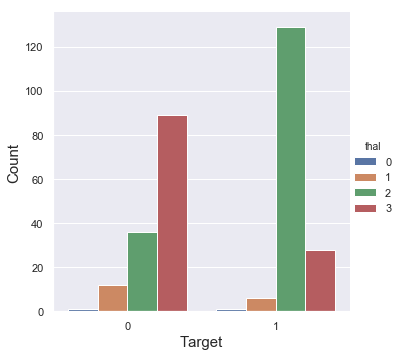

3.146295138318122e-18

In [41]:
#thal 	 3 = normal; 6 = fixed defect; 7 = reversable defect vs target 	 1 or 0
sns.catplot(hue="thal", x="target", kind="count", data=df1)
plt.xlabel("Target", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

df1["thal"].unique()

chisqt = pd.crosstab(df1.target,df1.thal, margins=True)
value= np.array([chisqt.iloc[0][0:4].values,
chisqt.iloc[1][0:4].values])
c, p, dof, expected= chi2_contingency(value)
p
# The thal and target variable have a correlation. 

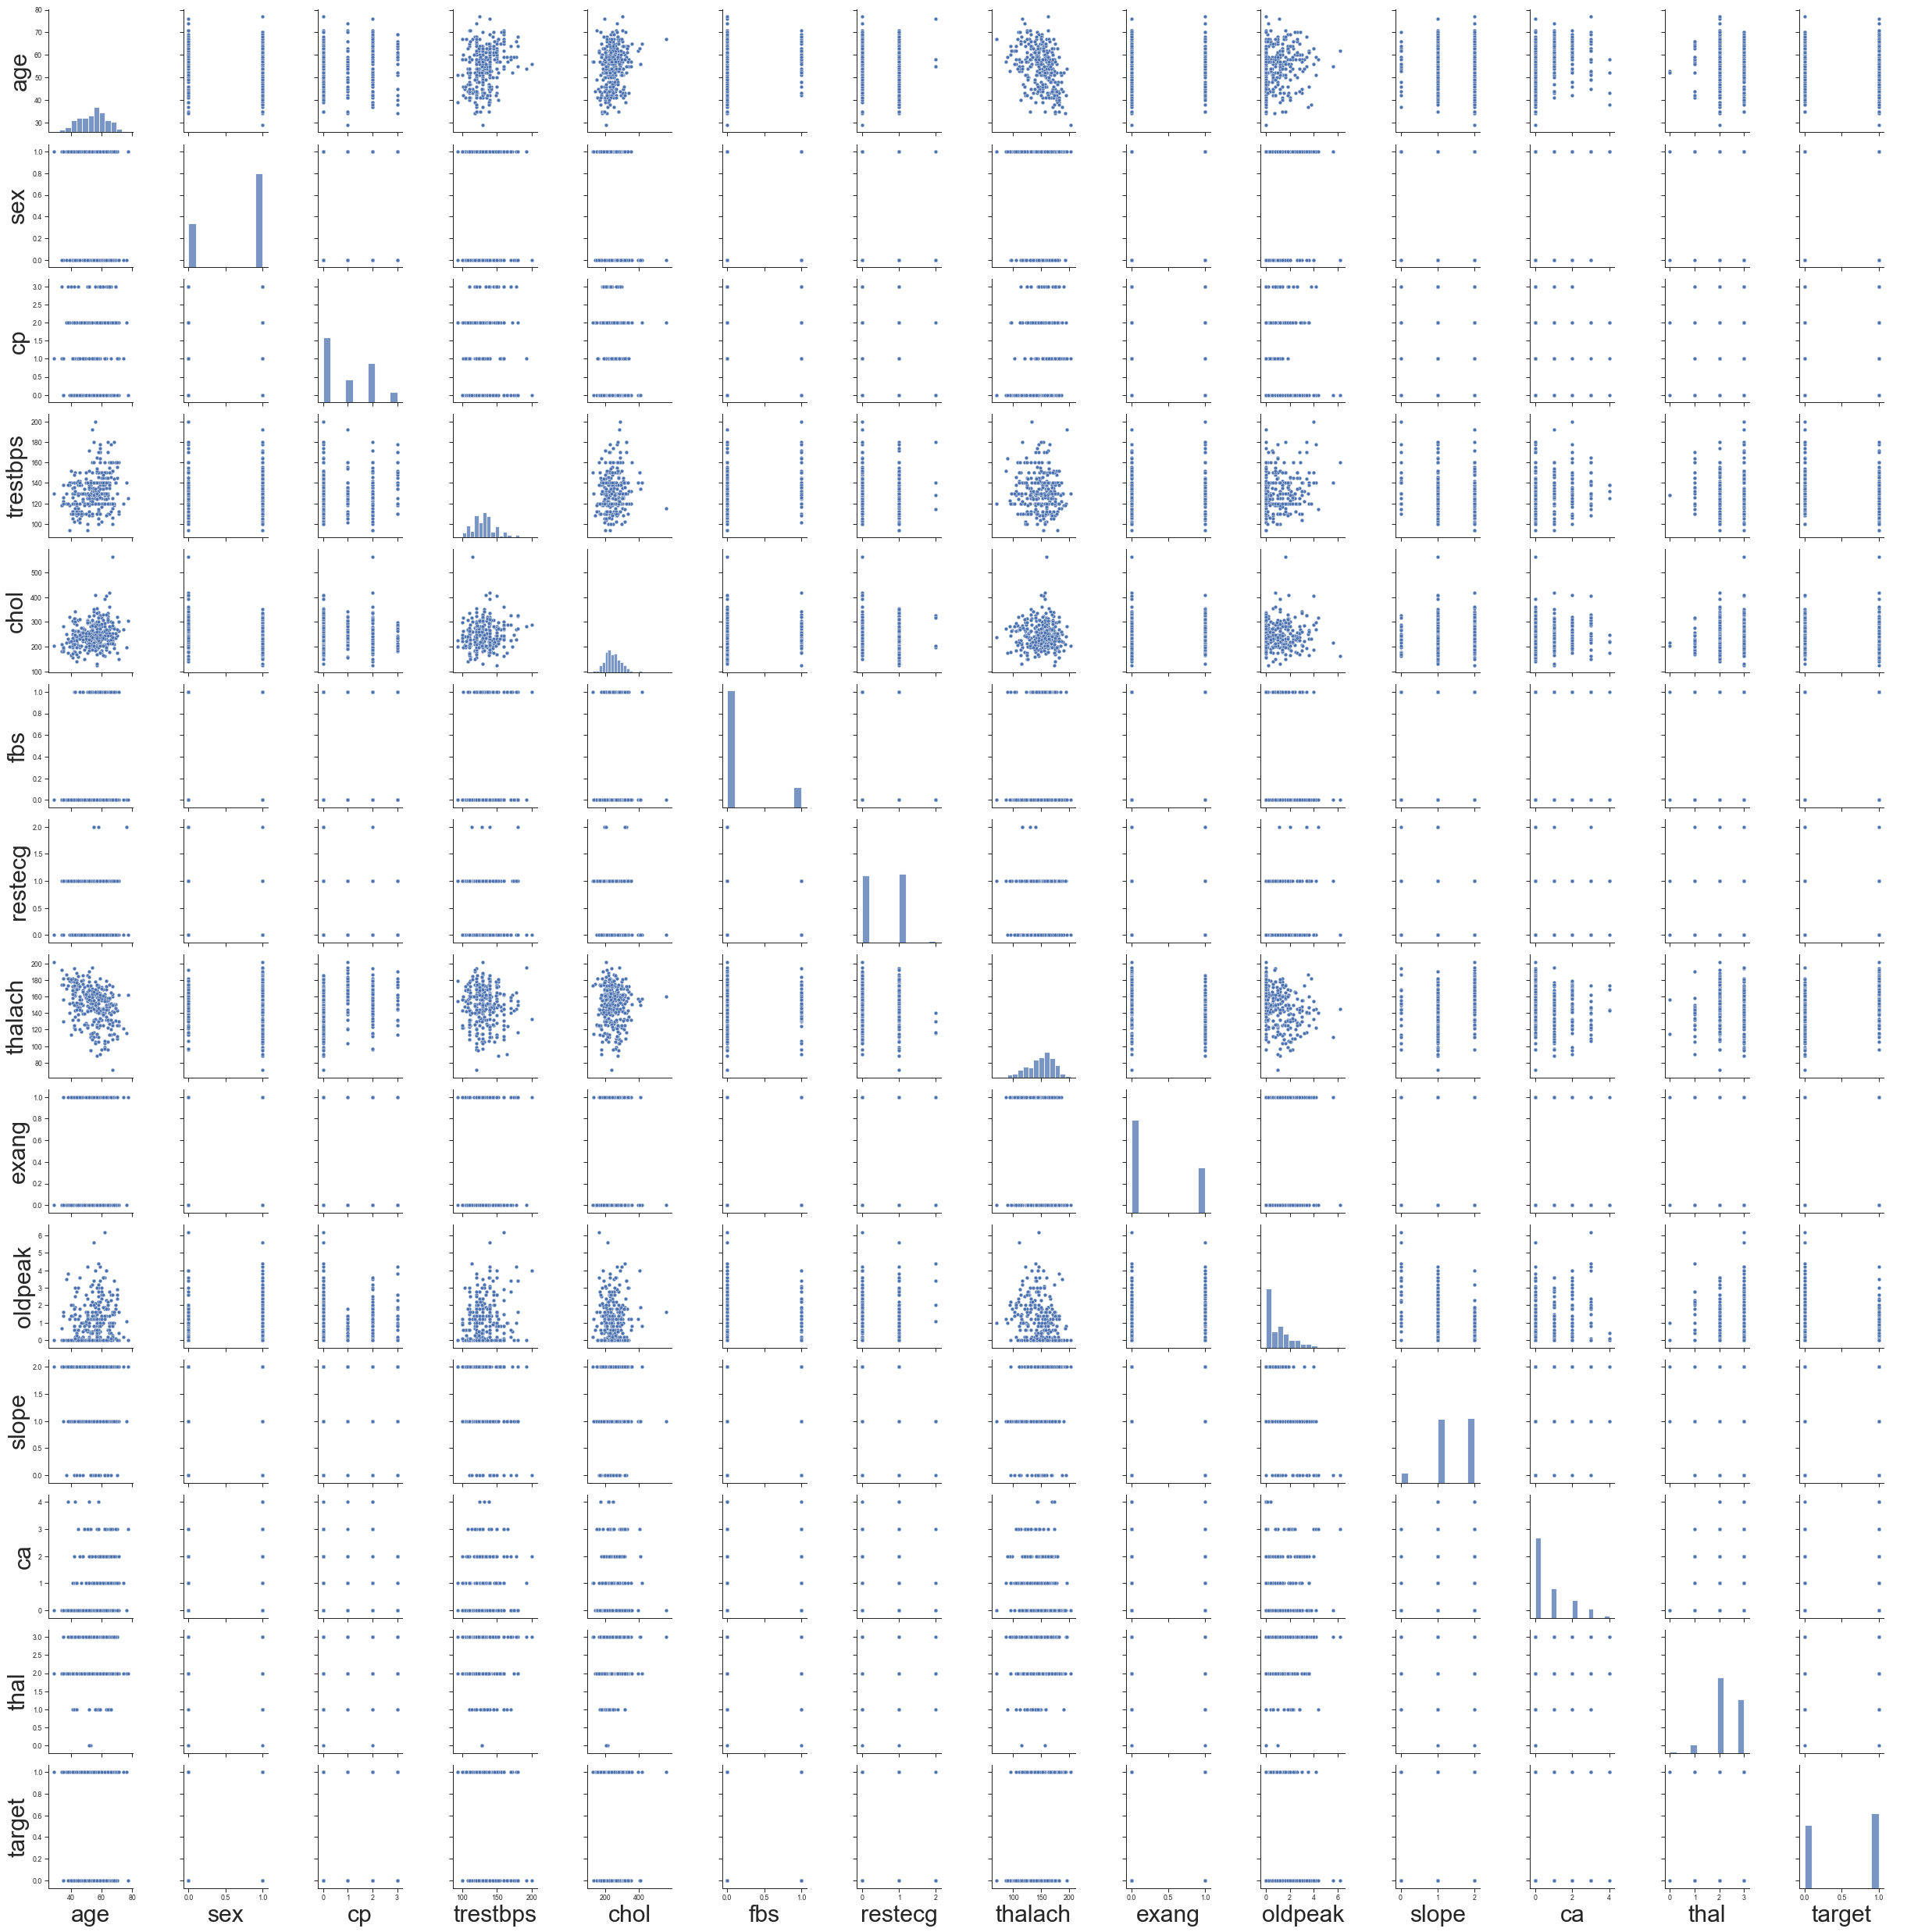

In [52]:
#Use a pair plot to understand the relationship between all the given variables.
sns.set(style="ticks", color_codes=True)
sns.set_context("paper", rc={"axes.labelsize":30})
sns.pairplot(df1)


In [70]:
#droping chol and fbs because they don't have correlation with target variable and using the remaining of the variables to build the model
df2= df1.drop(["chol","fbs"],axis=1).copy()

In [71]:
df2.head()

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,0,150,0,2.3,0,0,1,1
1,37,1,2,130,1,187,0,3.5,0,0,2,1
2,41,0,1,130,0,172,0,1.4,2,0,2,1
3,56,1,1,120,1,178,0,0.8,2,0,2,1
4,57,0,0,120,1,163,1,0.6,2,0,2,1


In [72]:
#changing categorical variables to dummy variables
colnames= ["sex","cp","exang","thal"]

df3= pd.get_dummies(df2, columns= colnames,drop_first=True)

In [73]:
df3.head()

,age,trestbps,restecg,thalach,oldpeak,slope,ca,target,sex_1,cp_1,cp_2,cp_3,exang_1,thal_1,thal_2,thal_3
0,63,145,0,150,2.3,0,0,1,1,0,0,1,0,1,0,0
1,37,130,1,187,3.5,0,0,1,1,0,1,0,0,0,1,0
2,41,130,0,172,1.4,2,0,1,0,1,0,0,0,0,1,0
3,56,120,1,178,0.8,2,0,1,1,1,0,0,0,0,1,0
4,57,120,1,163,0.6,2,0,1,0,0,0,0,1,0,1,0


In [74]:
# split the data to train and test data
train,test= train_test_split(df3, train_size= 0.7, random_state= 3)

train_y=train.pop("target")
train_x= train

test_y=test.pop("target")
test_x=test


In [75]:
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)
log_model.fit(train_x,train_y)
pv= log_model.predict(test_x)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_model.score(test_x, test_y)))

## The model correctly predicted whether or not someone have heart attack 85% of the time. 

Accuracy of logistic regression classifier on test set: 0.85


In [76]:
confusion_matrix = confusion_matrix(test_y, pv)
print(confusion_matrix)
# The model predicted 77 correctly and 14 incorrectly. 

[[27  9]
 [ 5 50]]


In [60]:
feature_importance=pd.DataFrame({'feature':list(train_x.columns),'feature_importance':[i for i in log_model.coef_[0]]})
feature_importance.sort_values('feature_importance',ascending=False)

,feature,feature_importance
10,cp_3,1.341434
9,cp_2,1.136195
13,thal_2,0.719544
2,restecg,0.718145
8,cp_1,0.638396
5,slope,0.337096
12,thal_1,0.332633
3,thalach,0.020196
0,age,-0.005125
1,trestbps,-0.017947


In [61]:
feature_importance=pd.DataFrame({'feature':list(train_x.columns),'feature_importance':[abs(i) for i in log_model.coef_[0]]})
feature_importance.sort_values('feature_importance',ascending=False)

,feature,feature_importance
10,cp_3,1.341434
9,cp_2,1.136195
11,exang_1,0.988580
14,thal_3,0.908035
7,sex_1,0.753244
13,thal_2,0.719544
2,restecg,0.718145
8,cp_1,0.638396
6,ca,0.525709
4,oldpeak,0.400748
